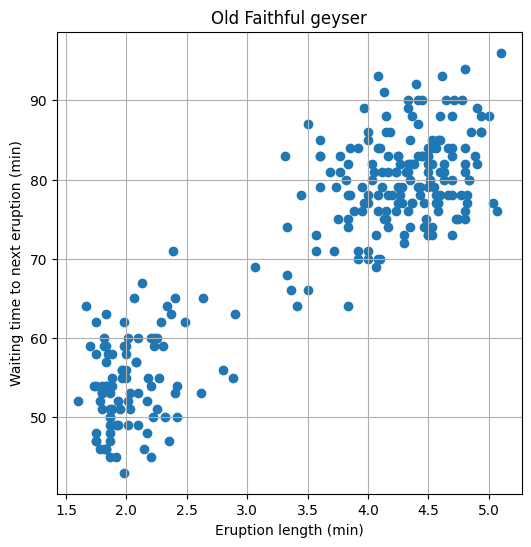

In [6]:
import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv('faithful.csv')
plt.figure(figsize=(6,6))
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption length (min)')
plt.ylabel('Waiting time to next eruption (min)')
plt.title('Old Faithful geyser')
plt.grid(True)
plt.show()


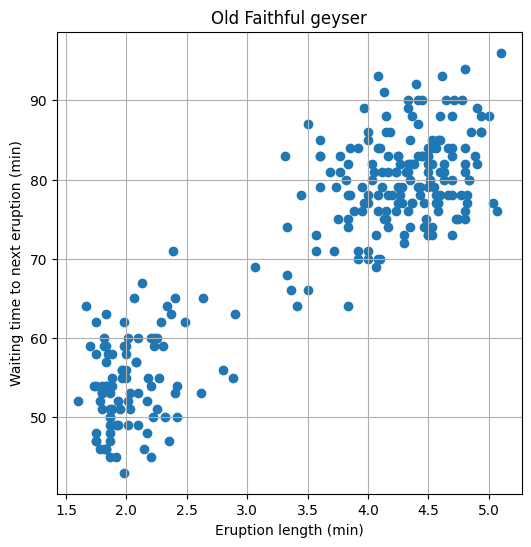

In [6]:
import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv('faithful.csv')
plt.figure(figsize=(6,6))
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption length (min)')
plt.ylabel('Waiting time to next eruption (min)')
plt.title('Old Faithful geyser')
plt.grid(True)
plt.show()


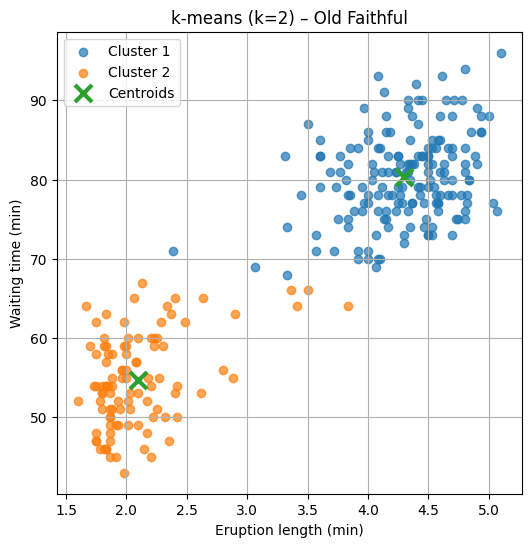

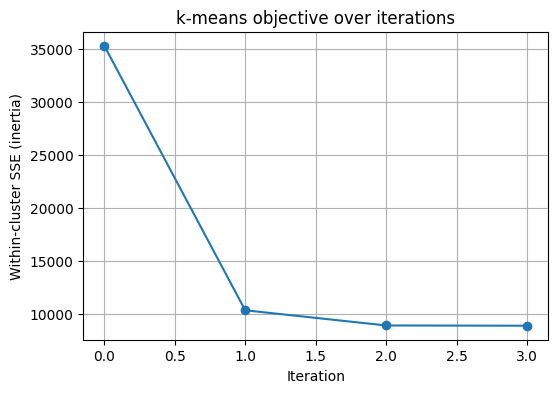

Final inertia: 8901.77


In [7]:
import numpy as np, matplotlib.pyplot as plt

X = df[['eruptions','waiting']].values

def kmeans(X, k, max_iter=100, tol=1e-4, seed=0):
    rng = np.random.RandomState(seed)
    centroids = X[rng.choice(len(X), k, replace=False)]
    inertia_history = []
    for _ in range(max_iter):
        # Assign step
        dists = ((X[:,None,:]-centroids[None,:,:])**2).sum(axis=2)
        labels = dists.argmin(axis=1)
        # Compute inertia (objective)
        inertia = ((X - centroids[labels])**2).sum()
        inertia_history.append(inertia)
        # Update step
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids-centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels, inertia_history

centroids, labels, inertia_hist = kmeans(X, k=2)

# Plot coloured clustering
plt.figure(figsize=(6,6))
for i in range(2):
    plt.scatter(X[labels==i,0], X[labels==i,1], label=f'Cluster {i+1}', alpha=.7)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=3, label='Centroids')
plt.xlabel('Eruption length (min)')
plt.ylabel('Waiting time (min)')
plt.title('k‑means (k=2) – Old Faithful')
plt.legend()
plt.grid(True)
plt.show()

# Plot objective vs. iteration
plt.figure(figsize=(6,4))
plt.plot(inertia_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Within‑cluster SSE (inertia)')
plt.title('k‑means objective over iterations')
plt.grid(True)
plt.show()

print(f'Final inertia: {inertia_hist[-1]:.2f}')
